# 2. Geopandas
Geopandas est une extension de pandas, permettant d'effectuer des opérations sur des données géoréférencées grâce à shapely. On peut notamment l'utiliser pour:
- importer / exporter des données géospatiales
- faire des analyses géométriques sur ces données
- visualiser des données

http://geopandas.org/index.html

In [1]:
import geopandas as gpd
%matplotlib notebook

training_folder = r'../'
gis_folder = training_folder +'gis/'
data_folder = training_folder + 'data/'

## 2.1 Structure de donnée
Pandas --> Series / DataFrame

Geopandas --> GeoSeries / GeoDataFrame

In [2]:
idf_geodf = gpd.read_file(gis_folder + 'idf/idf_geodf.shp')
idf_geodf.head()

,id,geometry
0,0,"POLYGON ((651906.008702183 6861749.976301555, ..."
1,1,"POLYGON ((652374.9444057639 6862785.991764748,..."
2,2,"POLYGON ((653656.9440464028 6861930.039442513,..."
3,3,"POLYGON ((653349.0099792558 6860868.041333271,..."
4,4,"POLYGON ((653467.0097691722 6860727.008892054,..."


In [3]:
type(idf_geodf)

geopandas.geodataframe.GeoDataFrame

In [4]:
type(idf_geodf['geometry'])

geopandas.geoseries.GeoSeries

In [5]:
type(idf_geodf['id'])

pandas.core.series.Series

Une GeoSeries est un vecteur composé de géométries shapely, toutes devant être de *même type*. Cet objet reprend la plupart des attributs et méthodes de shapely, qui sont ici appliqués élément par élément: une Series ou GeoSeries est ensuite renvoyée.

Exemples de méthodes et attributs:
- `area`
- `bounds`
- `is_valid`
- `centroid`

Un GeoDataFrame est un DataFrame contenant une colonne GeoSeries. Toute méthode spatiale appliquée au GeoDataFrame sera appliquée à la GeoSerie correspondante.

In [6]:
idf_geodf.area

0     1.809564e+06
1     9.654035e+05
2     1.149119e+06
3     1.612520e+06
4     2.484850e+06
5     2.165126e+06
6     4.042649e+06
7     3.884474e+06
8     2.196634e+06
9     2.895260e+06
10    3.608336e+06
11    1.636477e+07
12    7.144934e+06
13    5.670627e+06
14    8.487222e+06
15    1.634375e+07
16    5.627393e+06
17    5.994202e+06
18    6.784393e+06
19    5.954688e+06
dtype: float64

In [7]:
type(idf_geodf.area)

pandas.core.series.Series

In [8]:
idf_geodf.centroid

0     POINT (651302.2528649715 6862708.899566771)
1     POINT (651794.4588223477 6863326.493687944)
2     POINT (653033.0536424372 6862730.472811835)
3     POINT (652856.6171940195 6861787.472050426)
4     POINT (652340.7708215876 6860701.037079579)
5      POINT (651042.3727304607 6861216.83043402)
6     POINT (649525.3482218338 6862011.741968949)
7     POINT (649576.9482440241 6863851.955595866)
8     POINT (651404.4403395189 6864317.456638126)
9     POINT (653111.7600933176 6864188.112966944)
10    POINT (654501.3219864487 6862288.357161615)
11    POINT (657498.1660187435 6859592.863445161)
12    POINT (653182.7172002717 6858894.625056311)
13    POINT (650570.0102999121 6859009.054813125)
14    POINT (648093.7788043236 6860243.296202791)
15     POINT (645854.0083181442 6862520.53794924)
16    POINT (649168.0023341236 6865475.335863574)
17      POINT (652194.51521575 6866036.639816547)
18    POINT (654877.5855303592 6865386.672444915)
19    POINT (656057.1403304188 6862755.307986822)


In [9]:
type(idf_geodf.centroid)

geopandas.geoseries.GeoSeries

## 2.2 Importer des données et les visualiser

Geopandas `read_file` method can read almost every vector-based data format (GeoJSON, shapefile, ...) and returns a GeoDataFrame object.

In [10]:
idf_comm_geom = gpd.read_file(gis_folder + 'idf/idf_geom_only.shp')
idf_comm_geom.head()

,ID,ID_ND_RTE,ID_RTE500,SUP,geometry
0,75101,45010,30733,1.81,"POLYGON ((651906.008702183 6861749.976301555, ..."
1,75102,44667,30734,0.99,"POLYGON ((652374.9444057639 6862785.991764748,..."
2,75103,44858,30735,1.16,"POLYGON ((653656.9440464028 6861930.039442513,..."
3,75104,45122,30736,1.60,"POLYGON ((653349.0099792558 6860868.041333271,..."
4,75105,46008,30737,2.52,"POLYGON ((653467.0097691722 6860727.008892054,..."


In [11]:
# Import Orly airport position
orly = gpd.read_file(gis_folder + r'idf/orly_airport.shp')
orly.head()

,id,geometry
0,None,POINT (653452.5727407016 6848134.430723656)


<IPython.core.display.Javascript object>


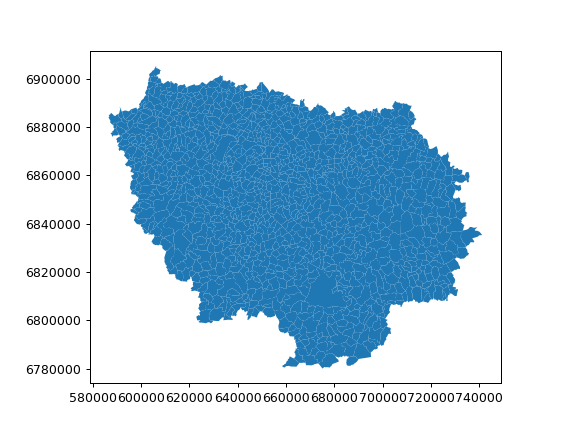

In [12]:
idf_comm_geom.plot()

<IPython.core.display.Javascript object>


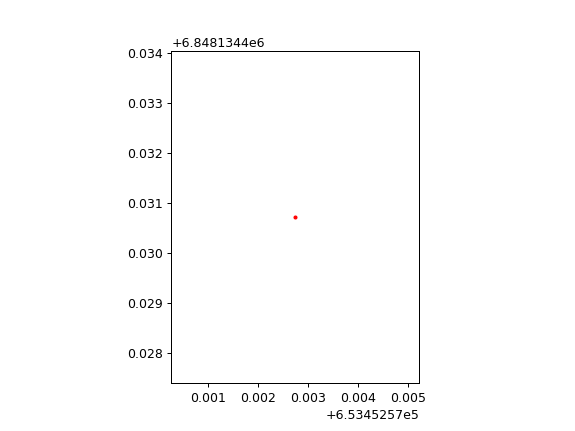

In [13]:
orly.plot(marker='o', color='red',markersize=5)

<IPython.core.display.Javascript object>


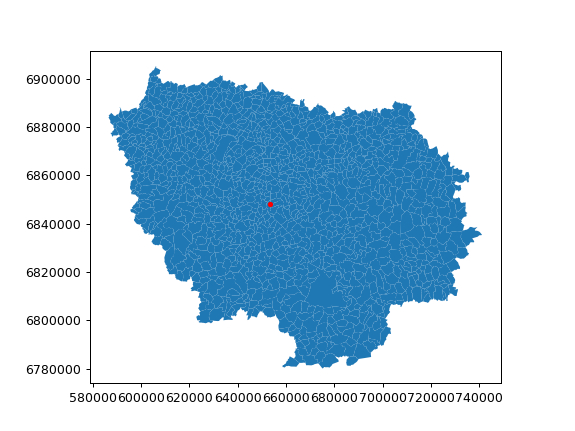

In [14]:
base = idf_comm_geom.plot()
orly.plot(ax=base, marker='o', color='red',markersize=10)

### 2.3 Analyser des données

Calculer l'aire des géométries.

In [15]:
idf_comm_geom['area'] = idf_comm_geom.area
idf_comm_geom.head()

,ID,ID_ND_RTE,ID_RTE500,SUP,geometry,area
0,75101,45010,30733,1.81,"POLYGON ((651906.008702183 6861749.976301555, ...",1.809564e+06
1,75102,44667,30734,0.99,"POLYGON ((652374.9444057639 6862785.991764748,...",9.654035e+05
2,75103,44858,30735,1.16,"POLYGON ((653656.9440464028 6861930.039442513,...",1.149119e+06
3,75104,45122,30736,1.60,"POLYGON ((653349.0099792558 6860868.041333271,...",1.612520e+06
4,75105,46008,30737,2.52,"POLYGON ((653467.0097691722 6860727.008892054,...",2.484850e+06


In [16]:
idf_comm_geom.head()

,ID,ID_ND_RTE,ID_RTE500,SUP,geometry,area
0,75101,45010,30733,1.81,"POLYGON ((651906.008702183 6861749.976301555, ...",1.809564e+06
1,75102,44667,30734,0.99,"POLYGON ((652374.9444057639 6862785.991764748,...",9.654035e+05
2,75103,44858,30735,1.16,"POLYGON ((653656.9440464028 6861930.039442513,...",1.149119e+06
3,75104,45122,30736,1.60,"POLYGON ((653349.0099792558 6860868.041333271,...",1.612520e+06
4,75105,46008,30737,2.52,"POLYGON ((653467.0097691722 6860727.008892054,...",2.484850e+06


In [17]:
idf_comm_geom.apply(
    lambda x: x['geometry'].area, 1
)

0       1.809564e+06
1       9.654035e+05
2       1.149119e+06
3       1.612520e+06
4       2.484850e+06
5       2.165126e+06
6       4.042649e+06
7       3.884474e+06
8       2.196634e+06
9       2.895260e+06
10      3.608336e+06
11      1.636477e+07
12      7.144934e+06
13      5.670627e+06
14      8.487222e+06
15      1.634375e+07
16      5.627393e+06
17      5.994202e+06
18      6.784393e+06
19      5.954688e+06
20      1.251079e+07
21      2.021624e+07
22      1.187369e+07
23      8.124532e+06
24      1.306309e+07
25      1.495973e+07
26      2.587532e+06
27      7.264215e+06
28      1.139389e+07
29      2.687457e+07
            ...     
1270    7.891273e+06
1271    7.697663e+06
1272    4.894478e+06
1273    5.408411e+06
1274    8.401157e+06
1275    1.125167e+07
1276    1.693927e+06
1277    3.979164e+06
1278    5.440339e+06
1279    1.042240e+07
1280    7.548446e+06
1281    5.000760e+06
1282    3.976854e+06
1283    1.096789e+07
1284    7.568624e+06
1285    4.534723e+06
1286    8.195

Tester l'inclusion d'une géométrie dans une autre.

In [18]:
orly_position = orly.geometry[0]
type(orly_position)

shapely.geometry.point.Point

In [19]:
idf_comm_geom.contains(orly_position)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1270    False
1271    False
1272    False
1273    False
1274    False
1275    False
1276    False
1277    False
1278    False
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299    False
Length: 1300, dtype: bool

In [20]:
idf_comm_geom[idf_comm_geom.contains(orly_position)]

,ID,ID_ND_RTE,ID_RTE500,SUP,geometry,area
928,91479,53857,36144,6.14,"POLYGON ((652450.9635011908 6844820.977595414,...",6.070502e+06


Faire un merge avec une DataFrame

In [21]:
import pandas as pd

# Import population file
idf_pop_data = pd.read_csv(data_folder + 'special_libraries/idf_pop.csv', index_col=0)
idf_pop_data.head()

,DEPCOM,MACROZONE,Macro_agre,NOM,POP2010,POP2011
0,75101,Paris,Paris Iintramuros,Paris 1er Arrondissement,17308,17443
1,75102,Paris,Paris Iintramuros,Paris 2e Arrondissement,23009,22927
2,75103,Paris,Paris Iintramuros,Paris 3e Arrondissement,35652,36120
3,75104,Paris,Paris Iintramuros,Paris 4e Arrondissement,28012,27887
4,75105,Paris,Paris Iintramuros,Paris 5e Arrondissement,60938,60800


In [22]:
idf_comm = idf_comm_geom.merge(
    idf_pop_data,
    left_on='ID', right_on='DEPCOM',
    how='left'
)
idf_comm.head()

,ID,ID_ND_RTE,ID_RTE500,SUP,geometry,area,DEPCOM,MACROZONE,Macro_agre,NOM,POP2010,POP2011
0,75101,45010,30733,1.81,"POLYGON ((651906.008702183 6861749.976301555, ...",1.809564e+06,75101,Paris,Paris Iintramuros,Paris 1er Arrondissement,17308,17443
1,75102,44667,30734,0.99,"POLYGON ((652374.9444057639 6862785.991764748,...",9.654035e+05,75102,Paris,Paris Iintramuros,Paris 2e Arrondissement,23009,22927
2,75103,44858,30735,1.16,"POLYGON ((653656.9440464028 6861930.039442513,...",1.149119e+06,75103,Paris,Paris Iintramuros,Paris 3e Arrondissement,35652,36120
3,75104,45122,30736,1.60,"POLYGON ((653349.0099792558 6860868.041333271,...",1.612520e+06,75104,Paris,Paris Iintramuros,Paris 4e Arrondissement,28012,27887
4,75105,46008,30737,2.52,"POLYGON ((653467.0097691722 6860727.008892054,...",2.484850e+06,75105,Paris,Paris Iintramuros,Paris 5e Arrondissement,60938,60800


Regrouper des entités

In [23]:
idf_macro = idf_comm.dissolve(by='MACROZONE')[['geometry']]
idf_macro

,geometry
MACROZONE,
77,(POLYGON ((708439.0272830732 6832910.033416778...
78,"POLYGON ((617127.0456217217 6816186.967036308,..."
91,"POLYGON ((653285.0177854935 6801113.968871938,..."
92,(POLYGON ((646994.9482149349 6857373.999477062...
93,(POLYGON ((657099.0206105292 6861840.972293394...
94 nord,(POLYGON ((650949.9834811878 6851818.024753411...
94 sud,"POLYGON ((659620.0180452894 6846223.019330019,..."
95,"POLYGON ((608710.0298379214 6883871.98691602, ..."
BVC bus,"POLYGON ((665870.0357640784 6853092.989791184,..."


<IPython.core.display.Javascript object>


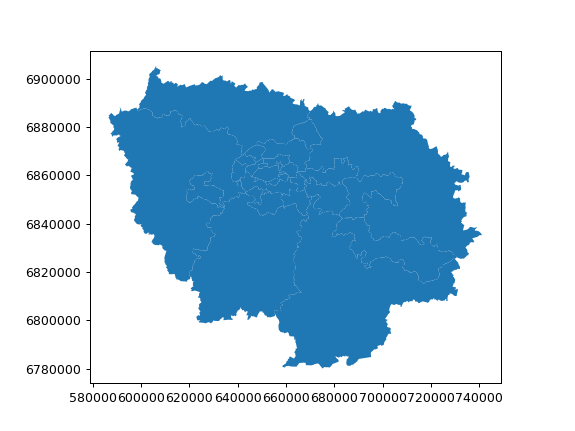

In [24]:
idf_macro.plot()

### 2.4 Changer de système de projection

Les géométries d'une GeoSeries ou GeoDataFrame sont simplement des coordonnées dans un plan cartésien. Elles ne contiennent pas de notion de projection.

Ceci est géré par un attribut: crs

In [25]:
idf_comm.crs

{'ellps': 'GRS80',
 'lat_0': 46.5,
 'lat_1': 49,
 'lat_2': 44,
 'lon_0': 3,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 700000,
 'y_0': 6600000}

On peut imposer un crs

In [26]:
idf_macro.crs

{'ellps': 'GRS80',
 'lat_0': 46.5,
 'lat_1': 49,
 'lat_2': 44,
 'lon_0': 3,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 700000,
 'y_0': 6600000}

In [27]:
idf_macro.crs = idf_comm.crs

On peut facilement changer de projection, en reprojetant l'ensemble des géométries

In [28]:
idf_macro_lat_lon = idf_macro.to_crs({'init' :'epsg:4326'})

In [29]:
idf_macro_lat_lon.head()

,geometry
MACROZONE,
77,"(POLYGON ((3.11444273612045 48.59633960268024,..."
78,"POLYGON ((1.879442139593003 48.44066771601719,..."
91,"POLYGON ((2.369945650914525 48.30867292205264,..."
92,"(POLYGON ((2.27817846471522 48.81425414046532,..."
93,(POLYGON ((2.415319447073479 48.85517774034831...


<IPython.core.display.Javascript object>


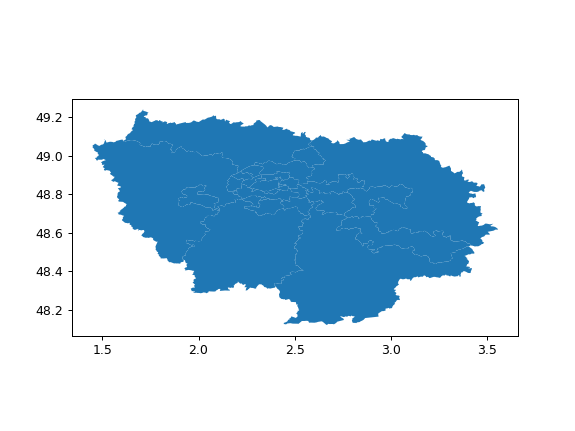

In [30]:
idf_macro_lat_lon.plot()

### 2.5 Exporter des données

L'export de données se fait simplement via la méthode:

to_file()

In [31]:
idf_macro_lat_lon.to_file(
    gis_folder + r'idf/exported/idf_macrozones_latlon.shp'
)